In [42]:
import numpy as np
import pandas as pd
import glob
import matplotlib as mpl
from matplotlib import mlab, cm
import matplotlib.mlab as ml
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Display plots in SVG format
%config InlineBackend.figure_format = 'svg'

# Display plots in cells
%matplotlib inline

from itertools import islice
import itertools as it

import morphoGrid as morph
# from scripts import morphoGrid_sl as morph_sl
import morphoGrid_noflex as morphnf# from scripts import morphoGrid_sl as morph_sl


In [43]:
path='/live/share/Badlands_simulations'
##################
#Sea-level curves#
################## 
SL_0=pd.read_csv(path+'/Delta_2020/Delta_running/data/SL0.csv', sep=' ', header=None)
SL_A10m_f500Kyr=pd.read_csv(path+'/Delta_2020/Delta_running/data/A10m_f500Kyr.csv', sep=' ',header=None)
SL_A50m_f500Kyr=pd.read_csv(path+'/Delta_2020/Delta_running/data/A50m_f500Kyr.csv', sep=' ',header=None)
SL_f5Myr=pd.read_csv(path+'/Delta_2020/Delta_running/data/f5Myr_A25m.csv', sep=' ',header=None)
SL_f500Kyr=pd.read_csv(path+'/Delta_2020/Delta_running/data/f500Kyr_A25m.csv', sep=' ',header=None)
SL_GH=pd.read_csv(path+'/Delta_2020/Delta_running/data/SL_GH.csv', sep=' ',header=None)
SL_IH=pd.read_csv(path+'/Delta_2020/Delta_running/data/SL_IH.csv', sep=' ',header=None)

sea_level= [SL_0, SL_A10m_f500Kyr, SL_A50m_f500Kyr, SL_GH, SL_IH]
sea_level_v1= [SL_0, SL_GH, SL_IH]


######################
#Simulation's results#
######################

sim=['/live/share/Badlands_simulations/Delta_2020/Delta_running/Synthetic/Delta_SL0_Te50/h5',
    '/live/share/Badlands_simulations/Delta_2020/Delta_running/IH_GH/Delta_SL_GH_Te50/h5',
     '/live/share/Badlands_simulations/Delta_2020/Delta_running/IH_GH/Delta_SL_IH_Te50/h5']
sim_nf=['/live/share/Badlands_simulations/Delta_2020/Delta_running/Synthetic/Delta_SL0_NoFlex/h5',
    '/live/share/Badlands_simulations/Delta_2020/Delta_running/IH_GH/Delta_SL_GH_NoFlex/h5',
     '/live/share/Badlands_simulations/Delta_2020/Delta_running/IH_GH/Delta_SL_IH_NoFlex/h5']



In [44]:
path='/live/share/Badlands_simulations'

hydroisostasy_XS=[ '/live/share/Badlands_simulations/Delta_2020/Delta_analysis/hydroisostasy/outputs/downdip-cross_section_hydroisostasy0_Te50.csv',
                  '/live/share/Badlands_simulations/Delta_2020/Delta_analysis/hydroisostasy/outputs/downdip-cross_section_hydroisostasy_GH_Te50.csv', 
                 '/live/share/Badlands_simulations/Delta_2020/Delta_analysis/hydroisostasy/outputs/downdip-cross_section_hydroisostasy_IH_Te50.csv']

watercolumn_XS=['/live/share/Badlands_simulations/Delta_2020/Delta_analysis/hydroisostasy/outputs/downdip-cross_section_watercolumn0_Te50.csv', 
               '/live/share/Badlands_simulations/Delta_2020/Delta_analysis/hydroisostasy/outputs/downdip-cross_section_watercolumn_GH_Te50.csv',
               '/live/share/Badlands_simulations/Delta_2020/Delta_analysis/hydroisostasy/outputs/downdip-cross_section_watercolumn_IH_Te50.csv']

elevation_XS=['/live/share/Badlands_simulations/Delta_2020/Delta_analysis/hydroisostasy/outputs/downdip-cross_section_elev0_Te50.csv', 
               '/live/share/Badlands_simulations/Delta_2020/Delta_analysis/hydroisostasy/outputs/downdip-cross_section_elev_GH_Te50.csv',
               '/live/share/Badlands_simulations/Delta_2020/Delta_analysis/hydroisostasy/outputs/downdip-cross_section_elev_IH_Te50.csv']

hydroisostasy_RM=[path+'/Delta_2020/Delta_analysis/hydroisostasy/outputs/Hydroisostasy_river_mouth_radius_10000Delta_SL0_Te50_050122.csv',
                path+'/Delta_2020/Delta_analysis/hydroisostasy/outputs/Hydroisostasy_river_mouth_radius_10000Delta_SL_GH_Te50_050122.csv',
                path+'/Delta_2020/Delta_analysis/hydroisostasy/outputs/Hydroisostasy_river_mouth_radius10000.0Delta_SL_IH_Te50050122.csv']

RM=[path+'/Delta_2020/Delta_data_extraction/Synthetic/Delta_SL0_Te50.csv',
    path+'/Delta_2020/Delta_data_extraction/IH_GH/Miller/Delta_SL_GH_Te50_120820manual.csv',
    path+'/Delta_2020/Delta_data_extraction/IH_GH/Miller/Delta_SL_IH_Te50.csv']

RM_NF=['/live/share/Badlands_simulations/Delta_2020/Delta_data_extraction/Synthetic/Delta_SL0_NoFlex.csv',
    '/live/share/Badlands_simulations/Delta_2020/Delta_data_extraction/IH_GH/Miller/Delta_SL_GH_NoFlex_120820manual.csv',
    '/live/share/Badlands_simulations/Delta_2020/Delta_data_extraction/IH_GH/Miller/Delta_SL_IH_NoFlex.csv']

nfile=len(pd.read_csv(hydroisostasy_RM[0],sep=',', header=None ))



In [45]:
#Datasets with Synthetic amplitudes
path='/live/share/Badlands_simulations'

hydroisostasy_XS_v2=[ '/live/share/Badlands_simulations/Delta_2020/Delta_analysis/hydroisostasy/outputs/downdip-cross_section_hydroisostasy0_Te50.csv',
                  '/live/share/Badlands_simulations/Delta_2020/Delta_analysis/hydroisostasy/outputs/downdip-cross_section_hydroisostasy_A10m_f500Kyr_Te50.csv',
                  '/live/share/Badlands_simulations/Delta_2020/Delta_analysis/hydroisostasy/outputs/downdip-cross_section_hydroisostasy_A50m_f500Kyr_Te50.csv',
                  '/live/share/Badlands_simulations/Delta_2020/Delta_analysis/hydroisostasy/outputs/downdip-cross_section_hydroisostasy_GH_Te50.csv', 
                 '/live/share/Badlands_simulations/Delta_2020/Delta_analysis/hydroisostasy/outputs/downdip-cross_section_hydroisostasy_IH_Te50.csv']

watercolumn_XS_v2=['/live/share/Badlands_simulations/Delta_2020/Delta_analysis/hydroisostasy/outputs/downdip-cross_section_watercolumn0_Te50.csv',
                   '/live/share/Badlands_simulations/Delta_2020/Delta_analysis/hydroisostasy/outputs/downdip-cross_section_watercolumn_A10m_f500Kyr_Te50.csv',
                   '/live/share/Badlands_simulations/Delta_2020/Delta_analysis/hydroisostasy/outputs/downdip-cross_section_watercolumn_A50m_f500Kyr_Te50.csv',
               '/live/share/Badlands_simulations/Delta_2020/Delta_analysis/hydroisostasy/outputs/downdip-cross_section_watercolumn_GH_Te50.csv',
               '/live/share/Badlands_simulations/Delta_2020/Delta_analysis/hydroisostasy/outputs/downdip-cross_section_watercolumn_IH_Te50.csv']

elevation_XS_v2=['/live/share/Badlands_simulations/Delta_2020/Delta_analysis/hydroisostasy/outputs/downdip-cross_section_elev0_Te50.csv',
                 '/live/share/Badlands_simulations/Delta_2020/Delta_analysis/hydroisostasy/outputs/downdip-cross_section_elev_A10m_f500Kyr_Te50.csv',
                 '/live/share/Badlands_simulations/Delta_2020/Delta_analysis/hydroisostasy/outputs/downdip-cross_section_elev_A50m_f500Kyr_Te50.csv',
               '/live/share/Badlands_simulations/Delta_2020/Delta_analysis/hydroisostasy/outputs/downdip-cross_section_elev_GH_Te50.csv',
               '/live/share/Badlands_simulations/Delta_2020/Delta_analysis/hydroisostasy/outputs/downdip-cross_section_elev_IH_Te50.csv']

nfile=len(pd.read_csv(hydroisostasy_RM[0],sep=',', header=None ))



In [88]:
#Calculating the mean, max and min of the hydroisostasy in the cross-section
nfile=len(pd.read_csv(hydroisostasy_RM[0],sep=',', header=None ))

mean_hydro_SL0=[]; mean_hydro_A10=[]; mean_hydro_A50=[]; mean_hydro_GH=[]; mean_hydro_IH=[]
max_hydro_SL0=[]; max_hydro_A10=[]; max_hydro_A50=[]; max_hydro_GH=[]; max_hydro_IH=[]
min_hydro_SL0=[]; min_hydro_A10=[]; min_hydro_A50=[]; min_hydro_GH=[]; min_hydro_IH=[]

means=[mean_hydro_SL0, mean_hydro_GH, mean_hydro_IH]
maxima=[max_hydro_SL0, max_hydro_GH, max_hydro_IH]
minima=[min_hydro_SL0, min_hydro_GH, min_hydro_IH]


for i in np.arange(0,len(hydroisostasy_XS),1):
    for step in np.arange(20,nfile,1):
        means[i].append(np.mean(np.asarray(pd.read_csv(hydroisostasy_XS[i]))[150:350, step]))
        maxima[i].append(np.max(np.asarray(pd.read_csv(hydroisostasy_XS[i]))[150:350, step]))
        minima[i].append(np.min(np.asarray(pd.read_csv(hydroisostasy_XS[i]))[150:350, step]))
        

hydroRM_SL0=pd.read_csv(hydroisostasy_RM[0], header=None)
hydroRM_GH=pd.read_csv(hydroisostasy_RM[1], header=None)
hydroRM_IH=pd.read_csv(hydroisostasy_RM[2], header=None)

In [47]:
#Calculating the elevation difference between time steps
elev_diff_SL0=[]
elev_diff_A10m=[]
elev_diff_A50m=[]
elev_diff_GH=[]
elev_diff_IH=[]

for step in np.arange(0,nfile,1):
    elev_diff_SL0.append(np.asarray(pd.read_csv(elevation_XS[0]))[200:350,step-1]-np.asarray(pd.read_csv(elevation_XS[0]))[200:350,step])
    elev_diff_GH.append(np.asarray(pd.read_csv(elevation_XS[1]))[200:350,step-1]-np.asarray(pd.read_csv(elevation_XS[1]))[200:350,step])
    elev_diff_IH.append(np.asarray(pd.read_csv(elevation_XS[2]))[200:350,step-1]-np.asarray(pd.read_csv(elevation_XS[2]))[200:350,step])

    elev_diff_A10m.append(np.asarray(pd.read_csv(elevation_XS_v2[1]))[200:350,step-1]-np.asarray(pd.read_csv(elevation_XS_v2[1]))[200:350,step])
    elev_diff_A50m.append(np.asarray(pd.read_csv(elevation_XS_v2[2]))[200:350,step-1]-np.asarray(pd.read_csv(elevation_XS_v2[2]))[200:350,step])

elev_diff=[elev_diff_SL0, elev_diff_GH, elev_diff_IH]
elev_diff_v2=[elev_diff_SL0, elev_diff_A10m, elev_diff_A50m, elev_diff_GH, elev_diff_IH]

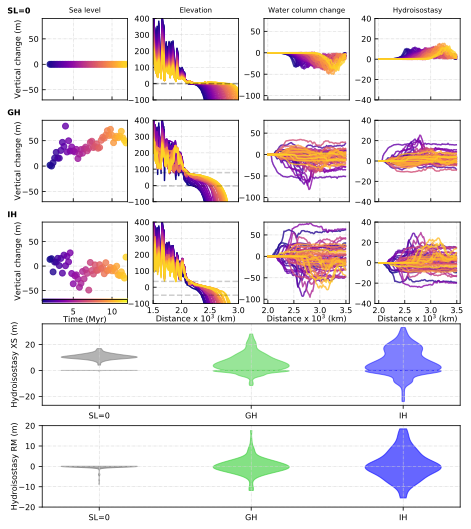

In [97]:
#Adding final cross-section at the bottom
nrows=5; ncols=4
fig, axes = plt.subplots(nrows=nrows,ncols=ncols, figsize=((19.05/2.54), 9)) # , dpi=300, sharey=True
plt.rcParams['pdf.fonttype'] = 42; plt.rcParams['ps.fonttype'] = 42; plt.rc("font", size=8)

#################
#Defining colors#
#################
colormap = plt.cm.plasma

color=[colormap(i) for i in np.linspace(0, 1, nfile-10)]

c = np.linspace(0, 1, nfile-10)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=plt.cm.plasma)
cmap.set_array([])
GH_color='limegreen'# GH_color=(0,1,0,0.7)
IH_color=(0,0,1,0.7)
color_marker=['dimgrey',  GH_color, IH_color]
alpha=.8
row_labels_v1=['SL=0','GH', 'IH']
column_title=['Sea level', 'Elevation', 'Water column change', 'Hydroisostasy']

ub=150 #Upstream boundary
db=350 #Downstream boundary
xs_i=100#index at which the cross-section is plotted
initial_step=19
final_step=119
###############
#cross-section#
###############
for i in np.arange(0,len(hydroisostasy_XS),1):                 
    for step in np.arange(20,nfile,2):
        morpho = morph.morphoGrid(sim[i],dx=1e4)
        morpho.loadHDF5(timestep=step)
        axes.T.flatten()[i+nrows].plot(morpho.x[xs_i,ub:db]/1e6, morpho.z[xs_i,ub:db], color=color[step-20])        
        axes.T.flatten()[i+nrows].set_ylim(-100,400)
        axes.T.flatten()[i+nrows].set_xlim(1.5,3)

        axes.T.flatten()[i].plot(sea_level_v1[i][0][int(np.argwhere(sea_level_v1[i][0]==step*1e5).flatten())]/1e6,
                                 sea_level_v1[i][1][int(np.argwhere(sea_level_v1[i][0]==step*1e5).flatten())],  'o', c=color[step-20], label=step, alpha=alpha)
        axes.T.flatten()[i+(nrows*2)].plot(np.asarray(pd.read_csv(watercolumn_XS[i]))[200:350, step], c=color[step-20], label=step, alpha=alpha)
        axes.T.flatten()[i+(nrows*3)].plot(np.asarray(pd.read_csv(hydroisostasy_XS[i]))[200:350, step], c=color[step-20], label=step, alpha=alpha)
        
 #Plotting shoreline location
    axes.T.flatten()[i+nrows].axhline(y=min(sea_level_v1[i][1]), linestyle='--', color='k', alpha=0.2)
    axes.T.flatten()[i+nrows].axhline(y=max(sea_level_v1[i][1]), linestyle='--', color='k', alpha=0.2)

        
########################
#violin cross-sections#
#######################
ax2=plt.subplot2grid((nrows,ncols),(nrows-2,0), colspan=ncols)

#Min    
parts2=ax2.violinplot(dataset=[min_hydro_SL0, min_hydro_GH, min_hydro_IH],positions=np.arange(0, len(hydroisostasy_XS), 1), showmeans=False, showmedians=False,
        showextrema=False)
for b,c in zip(parts2['bodies'],it.islice(it.cycle(color_marker), 0, len(parts2['bodies']))):
    b.set_facecolor(c)
    b.set_edgecolor(c)
    b.set_alpha(.5)

#Max     
parts2=ax2.violinplot(dataset=[max_hydro_SL0, max_hydro_GH, max_hydro_IH],positions=np.arange(0, len(hydroisostasy_XS), 1), showmeans=False, showmedians=False,
        showextrema=False)

for b,c in zip(parts2['bodies'],it.islice(it.cycle(color_marker), 0, len(parts2['bodies']))):
    b.set_facecolor(c)
    b.set_edgecolor(c)
    b.set_alpha(.5)
    

ax2.grid(color='lightgrey', linestyle='-.', linewidth=0.5)
ax2.set_ylabel('Hydroisostasy XS (m)', labelpad=-0.1)
ax2.set_xticks(np.arange(0,3,1))
ax2.set_xticklabels([ 'SL=0',  'GH', 'IH'])#'

#############
#River mouth#
#############
ax3=plt.subplot2grid((nrows,ncols),(nrows-1,0), colspan=ncols)

parts3=ax3.violinplot(dataset=[hydroRM_SL0[0], hydroRM_GH[0], hydroRM_IH[0]],positions=np.arange(0, len(hydroisostasy_XS), 1), showmeans=False, showmedians=False,
        showextrema=False)
for b,c in zip(parts3['bodies'],it.islice(it.cycle(color_marker), 0, len(parts3['bodies']))):
    b.set_facecolor(c)
    b.set_edgecolor(c)
    b.set_alpha(.6)
ax3.grid(color='lightgrey', linestyle='-.', linewidth=0.5)

ax3.set_ylabel('Hydroisostasy RM (m)', labelpad=-0.1)
ax3.set_xticks(np.arange(0,3,1))
ax3.set_xticklabels([ 'SL=0',  'GH', 'IH'])#'
ax3.set_ylim(-20,20)





############
#Formatting#
############ 
for i in np.arange(0,ncols*nrows,1):
    axes.T.flatten()[i].grid(color='lightgrey', linestyle='-.', linewidth=0.5)
    axes.T.flatten()[i].tick_params(direction= 'in')
#     First column
    if i<nrows-2:
        axes.T.flatten()[i].set_ylabel('Vertical change (m)', labelpad=-0.1)
        axes.T.flatten()[i].set_ylim(-70, 90)
        axes.T.flatten()[i].set_xlim(1, 12)
        axes.T.flatten()[i].text(-3.5,100, row_labels_v1[i] ,weight='bold' )
    # First row
    if i<ncols:
        axes.flatten()[i].set_title(column_title[i], fontsize=7)
        #Third & fourth columns
    if i>=nrows*2 and i<nrows*3:
        axes.T.flatten()[i].set_ylim(-110, 80)
    if i>=nrows*3:
        axes.T.flatten()[i].set_ylim(-40, 40)
    if i<ncols*2:
        axes.flatten()[i].set_xticklabels([])       
    if i==2:
        axes.T.flatten()[i].set_xlabel('Time (Myr)', labelpad=-0.1)
        axes.T.flatten()[i].set_xticks([5, 10])
        axes.T.flatten()[i].set_xticklabels([5, 10])
        axes.T.flatten()[i].tick_params ('x', pad=8)
    if i== 9:        
        axes.flatten()[i].set_xticks(np.arange(1.5,3.5, .5))
        axes.flatten()[i].set_xticklabels(np.arange(1.5,3.5, .5))
        axes.flatten()[i].set_xlabel('Distance x $10^3$ (km)', labelpad=-0.1)
  
    if i>= 10 and  i<= 11 :        
        axes.flatten()[i].set_xticks(np.arange(0,200, 50))
        axes.flatten()[i].set_xticklabels(['2.0',  '2.5',  '3.0', '3.5'])
        axes.flatten()[i].set_xlabel('Distance x $10^3$ (km)', labelpad=-0.1)


divider = make_axes_locatable(axes.T.flatten()[2])
cax = divider.append_axes("bottom", size="5%", pad=-0.01)
cbar = plt.colorbar(cmap, cax=cax, orientation='horizontal', ticks=[] )#np.arange(0,1.2,0.2)  ,ticks=[4, 6] label='Time (Myr)' ticks=np.arange(20,120,10)
# cbar.ax.set_xticklabels(['5', '10']) 
plt.rcParams['pdf.fonttype'] = 42; plt.rcParams['ps.fonttype'] = 42; plt.rc("font", size=8)

fig.subplots_adjust(wspace=0.3, hspace=0.25)

fig.savefig('./figures/Fig_Hydroisostasy_downdip_section_010922.pdf', bbox_inches='tight', dpi=300)   


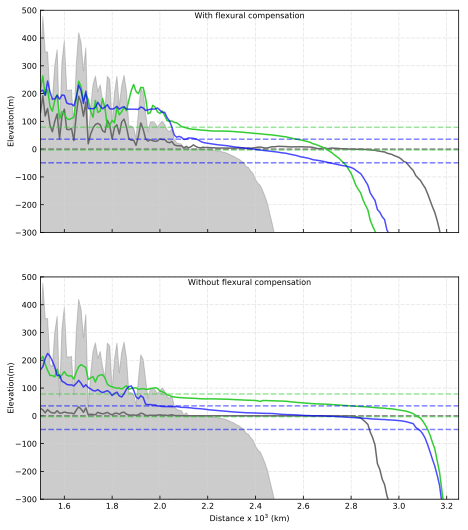

In [119]:
nrows=2; ncols=1
fig, axes = plt.subplots(nrows=nrows,ncols=ncols, figsize=((19.05/2.54), 9)) # , dpi=300, sharey=True
plt.rcParams['pdf.fonttype'] = 42; plt.rcParams['ps.fonttype'] = 42; plt.rc("font", size=8)

##############################
#Cross-section final timestep#
##############################
ax3=plt.subplot2grid((nrows,ncols),(0,0))

#Initial cross-section flexural cases
morpho = morph.morphoGrid(sim[0],dx=1e4)
morpho.loadHDF5(timestep=initial_step)
ax3.fill(np.append(min(morpho.x[xs_i,ub:db]/1e6), morpho.x[xs_i,ub:db]/1e6),
         np.append(min(morpho.z[xs_i,ub:db]), morpho.z[xs_i,ub:db]),alpha=0.4,  color='grey')


for i in np.arange(0,len(sim),1):                 
        morpho = morph.morphoGrid(sim[i],dx=1e4)
        morpho.loadHDF5(timestep=final_step)
        ax3.plot(morpho.x[xs_i,ub:db]/1e6, morpho.z[xs_i,ub:db], color=color_marker[i])
#         ax3.plot(pd.read_csv(RM[i]).X[final_step]/1e6, pd.read_csv(RM[i]).Z[final_step], '^', color=color_marker[i])
#         ax3.plot(pd.read_csv(RM[i]).X[final_step]/1e6, pd.read_csv(RM[i]).Z[final_step], '^', color=color_marker[i])

#         if i==0:
#             ax3.plot(pd.read_csv(RM[i]).X[initial_step]/1e6, 0, 'v', color='k')
        ax3.axhline(y=min(sea_level_v1[i][1]), linestyle='--', color=color_marker[i], alpha=0.5)
        ax3.axhline(y=max(sea_level_v1[i][1]), linestyle='--', color=color_marker[i], alpha=0.5)

            
#Initial cross-section non-flexural cases      
ax4=plt.subplot2grid((nrows,ncols),(1,0))
morpho = morphnf.morphoGrid_noflex(sim[0],dx=1e4)
morpho.loadHDF5(timestep=initial_step)
ax4.fill(np.append(min(morpho.x[xs_i,ub:db]/1e6), morpho.x[xs_i,ub:db]/1e6),
         np.append(min(morpho.z[xs_i,ub:db]), morpho.z[xs_i,ub:db]),alpha=0.4,  color='grey')

for i in np.arange(0,len(sim),1): 
        morpho = morphnf.morphoGrid_noflex(sim_nf[i],dx=1e4)
        morpho.loadHDF5(timestep=final_step)
        ax4.plot(morpho.x[xs_i,ub:db]/1e6, morpho.z[xs_i,ub:db], color=color_marker[i])
#         ax4.plot(pd.read_csv(RM_NF[i]).X[final_step]/1e6, 0, '^', color=color_marker[i])
        ax4.axhline(y=min(sea_level_v1[i][1]), linestyle='--', color=color_marker[i], alpha=0.5)
        ax4.axhline(y=max(sea_level_v1[i][1]), linestyle='--', color=color_marker[i], alpha=0.5)
#         if i==0:
#             ax4.plot(pd.read_csv(RM_NF[i]).X[initial_step]/1e6, 0, 'v', color='k')

        
ax3.set_ylim(-300,500); ax4.set_ylim(-300,500)
ax3.set_xlim(1.5, 3.25); ax4.set_xlim(1.5, 3.25)

ax3.set_ylabel('Elevation(m)',  labelpad=-0.1); ax4.set_ylabel('Elevation(m)',  labelpad=-0.1)  
ax4.set_xlabel('Distance x $10^3$ (km)')
ax3.set_title('With flexural compensation', pad=-8, fontsize=8); ax4.set_title('Without flexural compensation', pad=-8, fontsize=8)
ax3.grid(color='lightgrey', linestyle='-.', linewidth=0.5); ax4.grid(color='lightgrey', linestyle='-.', linewidth=0.5)
ax3.tick_params(direction= 'in'); ax4.tick_params(direction= 'in')
ax3.set_xticklabels([]) 

fig.savefig('./figures/Fig_downdip_section_finalstage_010922.jpg', bbox_inches='tight', dpi=300)   

